In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml


In [33]:
mnist = fetch_openml('mnist_784')
# view the shape of the dataset
mnist.data.shape

(70000, 784)

In [34]:
print(mnist.data.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

In [35]:
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(mnist.data)

In [36]:
pca = PCA()
pca.fit(scaled_df)

PCA()

Text(0, 0.5, 'Proportion of Explained Variance')

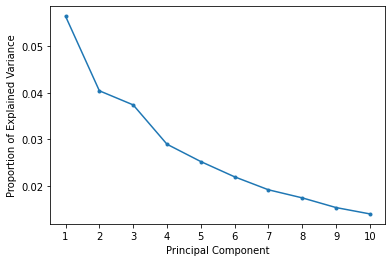

In [37]:
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker = '.')
plt.xticks(ticks = range(1, 11))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=3)

In [40]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [41]:
pca = PCA(n_components = 4) #using 4 because that is where things drop off in the elbow diagram
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [44]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_pca, y_train)

print('Training accuracy:', logreg.score(X_train_pca, y_train))
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Training accuracy: 0.6148380952380952
Testing accuracy: 0.6113714285714286
